# 🧠 Notebook 4 — Modelling Pipeline

This notebook is where we begin the **machine learning stage** of our project.
  
After cleaning and preprocessing in Notebooks 2 & 3, we now focus on:

 1. Preparing the dataset for machine learning (splitting and scaling).
   
 2. Training baseline models (Logistic Regression and Random Forest).
   
 3. Evaluating the models using multiple metrics.
   
 4. Selecting and saving the best model for deployment.

The goal is to establish **baseline performance** and understand which type of

model works best on this dataset.

---

## 4.1 Import Libraries

Here we import all the required libraries:

- **pandas, numpy** → manage structured data and numerical operations.
  
- **matplotlib, seaborn** → visualization for model evaluation.
  
- **scikit-learn (sklearn)** → main ML toolkit for splitting, preprocessing, 
  =  training, and evaluation.

- **joblib** → saving and reloading models/scalers for deployment.

Together, these libraries form the standard ML stack in Python projects.

In [18]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix, RocCurveDisplay
)
import joblib

---

## 4.2 Load Dataset

We now load the **cleaned dataset** from Notebook 3.

- This ensures all cleaning and preprocessing steps are applied consistently.
  
- It prevents **data leakage** (where information from the test set influences training).
  
- The dataset we load here is "ready-to-use" for machine learning.

In [19]:
df = pd.read_csv('outputs/datasets/cleaned/heart_disease_cleaned.csv')
print(df.columns.tolist())   # see all column names
print(df.head())  

rows, cols = df.shape
print(f"✅ The dataset has {rows} rows and {cols} columns.")


['id', 'age', 'trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak', 'sex_Male', 'dataset_Hungary', 'dataset_Switzerland', 'dataset_VA Long Beach', 'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina', 'restecg_normal', 'restecg_st-t abnormality', 'HeartDisease', 'num']
   id  age  trestbps   chol    fbs  thalch  exang  oldpeak  sex_Male  \
0   1   63     145.0  233.0   True   150.0  False      2.3      True   
1   2   67     160.0  286.0  False   108.0   True      1.5      True   
2   3   67     120.0  229.0  False   129.0   True      2.6      True   
3   4   37     130.0  250.0  False   187.0  False      3.5      True   
4   5   41     130.0  204.0  False   172.0  False      1.4     False   

   dataset_Hungary  dataset_Switzerland  dataset_VA Long Beach  \
0            False                False                  False   
1            False                False                  False   
2            False                False                  False   
3            False     

---

## 4.3 Define Features and Target

Machine learning models need:

- **Features (X):** patient health indicators (age, cholesterol, etc.)
  
- **Target (y):** the outcome we want to predict (`HeartDisease`).

Separating X and y makes the problem explicit:

*"Given these features, can the model predict heart disease?"*

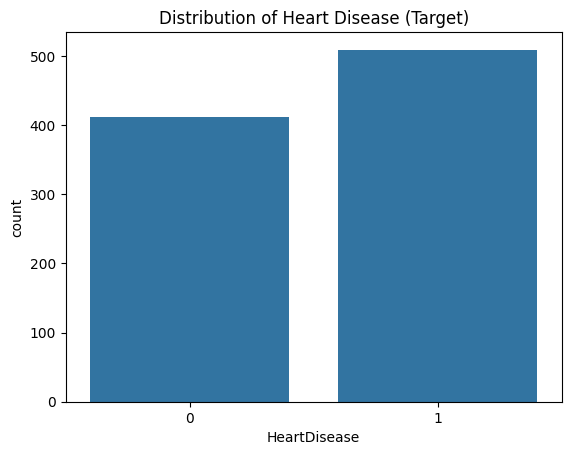

In [27]:
# Distribution of HeartDisease
import seaborn as sns
import matplotlib.pyplot as plt

X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

sns.countplot(x=y)
plt.title("Distribution of Heart Disease (Target)")
plt.show()



---

## 4.4 Split Data

To evaluate fairly, we split the dataset into **independent subsets**:

- **Training set (70%)** → used to train the model.
  
- **Validation set (15%)** → used to tune and compare models.
  
- **Test set (15%)** → kept aside until the end, simulating "new" unseen data.

This ensures we avoid **overfitting** and get a realistic picture of performance.

We also use `stratify=y` to preserve the class balance across all splits.

In [28]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print("Train size:", X_train.shape)
print("Validation size:", X_val.shape)
print("Test size:", X_test.shape)

Train size: (644, 18)
Validation size: (138, 18)
Test size: (138, 18)


---

## 4.5 Feature Scaling

Some algorithms (like Logistic Regression, KNN, or SVM) are sensitive to

differences in feature scales. For example:

 - Cholesterol might range from 100–400
  
 - Age might range from 30–80

 If left unscaled, features with larger ranges dominate the model.

 We therefore:

 - Fit a **StandardScaler** on the training set.
  
 - Apply the same transformation to validation and test sets.

Note: Random Forests are tree-based and do **not** need scaling,

but we still scale for consistency across models.

In [31]:
import os
import joblib

# Create models folder if it doesn't exist
os.makedirs("models", exist_ok=True)

# Save scaler
joblib.dump(scaler, "models/scaler.pkl")
print("✅ Scaler saved to models/scaler.pkl")


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Save scaler for later deployment
joblib.dump(scaler, "models/scaler.pkl")

✅ Scaler saved to models/scaler.pkl


['models/scaler.pkl']